In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import of the csv file
df = pd.read_csv("Py netflix1.csv")

In [4]:
#first look to the database
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [5]:
#dropping columns that are not needed
df=df.drop(columns="show_id")
df

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [6]:
#getting for details about the db nad see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [7]:
#getting a glimpse of the unique values
df.nunique()

type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [8]:
data_type=df["type"].value_counts()
data_type

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

<Axes: xlabel='type'>

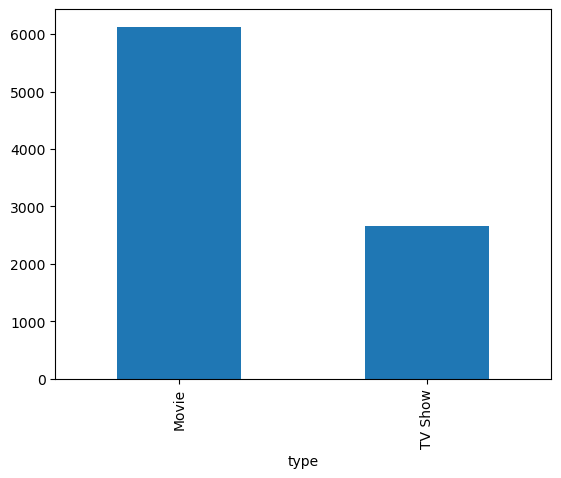

In [10]:
data_type.plot(kind='bar')

In [56]:
country_type_counts = df.groupby(['country', 'type']).size().unstack(fill_value=0)
country_total_counts = country_type_counts.sum(axis=1)
top_10_countries = country_total_counts.nlargest(10)
country_type_counts
top_10_countries

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
dtype: int64

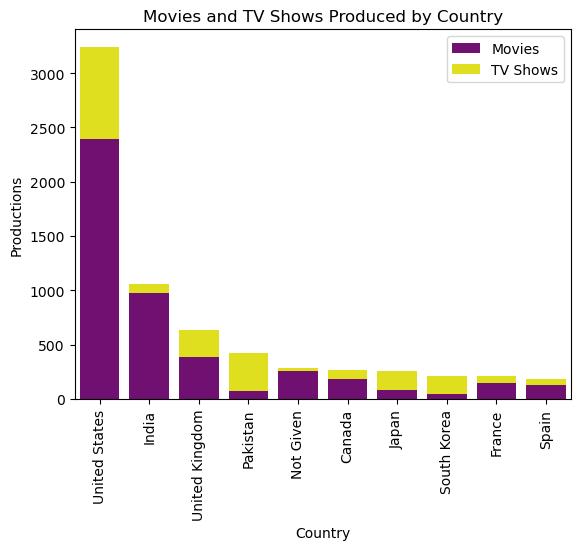

In [28]:
import seaborn as sns

sns.barplot(data=country_type_counts.loc[top_10_countries.index], x=top_10_countries.index, y='Movie', color='purple', label='Movies')


sns.barplot(data=country_type_counts.loc[top_10_countries.index], x=top_10_countries.index, y='TV Show', color='yellow', label='TV Shows', bottom=country_type_counts.loc[top_10_countries.index, 'Movie'])


plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Productions')
plt.title('Movies and TV Shows Produced by Country')
plt.legend()

In [52]:
data_ratings = df['rating'].value_counts()
data_ratings

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

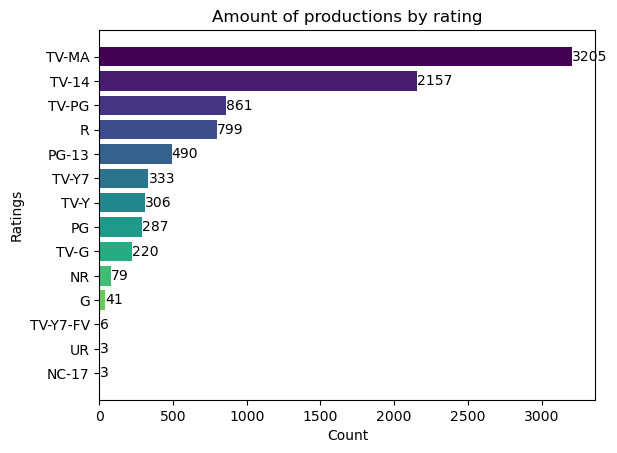

In [53]:
import matplotlib.pyplot as plt
import numpy as np

rating_type = data_ratings.index.values
rating_counts = data_ratings.values

# Sort data by counts in descending order
sorted_indices = np.argsort(rating_counts)[::-1]
rating_type_sorted = [rating_type[i] for i in sorted_indices]
rating_counts_sorted = [rating_counts[i] for i in sorted_indices]

# Automatically assign colors
colors = plt.cm.viridis(np.linspace(0, 1, len(rating_type_sorted)))

# Create a horizontal bar chart
plt.barh(rating_type_sorted, rating_counts_sorted, color=colors)
plt.gca().invert_yaxis()

# Display values on the bars
for i, value in enumerate(rating_counts_sorted):
    plt.text(value, i, str(value), ha='left', va='center')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.title('Amount of productions by rating')

# Show the plot
plt.show()